<a href="https://colab.research.google.com/github/shruti-madhav/Sentiment_Analysis/blob/main/Sentimnt_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

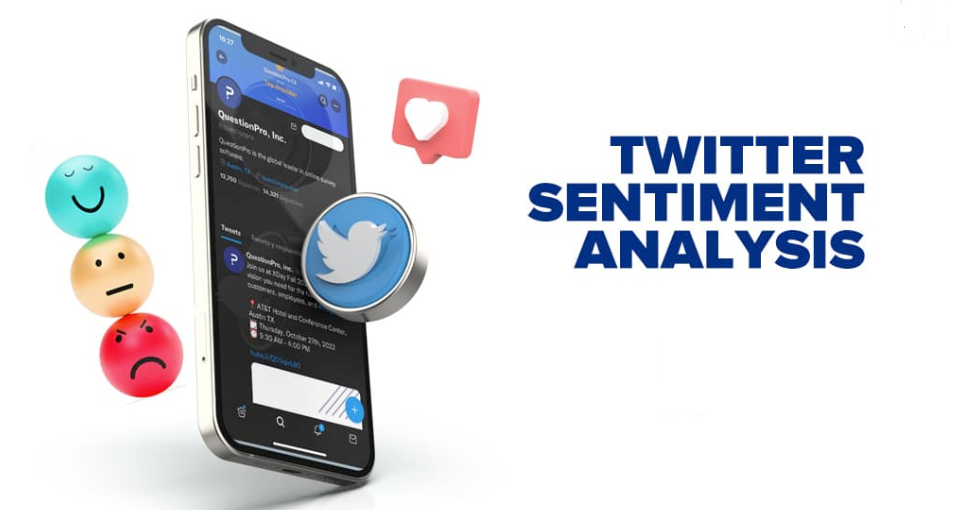

# **Sentiment Analysis on Tweets**

In [ ]:
!pip install nltk
!pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 3.1 MB/s eta 0:00:00


### **Imports**

In [ ]:
import re
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
nltk.download('punkt')
nltk.download("wordnet")
nltk.download("omw-1.4")
from textblob import TextBlob
import matplotlib.pyplot as plt
from keras.regularizers import l2
from sklearn import preprocessing
from keras.utils import pad_sequences
from nltk.tokenize import word_tokenize
from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense, Dropout,InputLayer
from keras.layers import LSTM, Flatten, BatchNormalization,Activation
from tensorflow.keras.layers import Embedding, GlobalMaxPooling1D, Dense,Conv1D

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### **Reading the data.**

In [ ]:
# Dataset from kaggle
data = pd.read_csv('/content/drive/MyDrive/tweets.csv', encoding="ISO-8859-1")
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


### **Adding the column names.**

In [ ]:
data.columns = ['sentiment', 'tweet_id', 'date', 'flag', 'user', 'content']

In [ ]:
data.head()

,sentiment,tweet_id,date,flag,user,content
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
data.shape
# 1.6M tweets

(1599999, 6)

In [ ]:
data.describe()

,sentiment,tweet_id
count,1.599999e+06,1.599999e+06
mean,2.000001e+00,1.998818e+09
std,2.000001e+00,1.935757e+08
min,0.000000e+00,1.467811e+09
25%,0.000000e+00,1.956916e+09
50%,4.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1599999 non-null  int64 
 1   tweet_id   1599999 non-null  int64 
 2   date       1599999 non-null  object
 3   flag       1599999 non-null  object
 4   user       1599999 non-null  object
 5   content    1599999 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


### **Let's check for null values**

In [ ]:
data.isnull().sum()

sentiment    0
tweet_id     0
date         0
flag         0
user         0
content      0
dtype: int64

# **Sentiment column has already being annoted to**

**0 -> negative**


**2 -> neutral**


**4 -> positive**

In [ ]:
data['sentiment'].unique()

array([0, 4])

We got [0,4] which means two sentiments which were annoted as negative ans positve.

Now,

### Let's see **Plot for Count of the two sentiments**



<Axes: xlabel='sentiment', ylabel='count'>

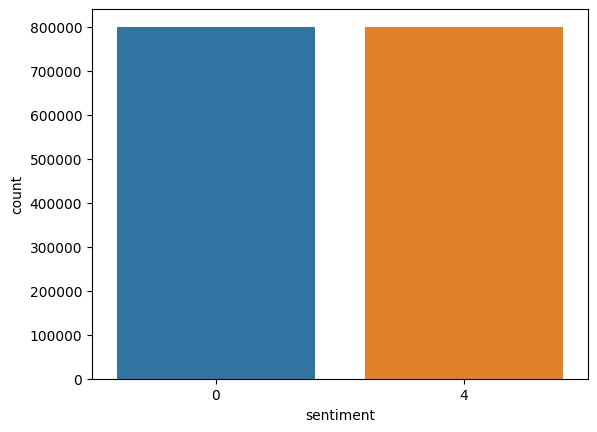

In [ ]:
sns.countplot(x='sentiment', data=data)

### **This shows that the sentiments are highly balanced.**

# **Text Preprocessing**

### **Using only half of my OG data as my data is very very large.**

In [ ]:
# half of my og data
# The_data = data.sample(n = 800000, random_state = 69)
The_data = data.sample(n = 10000, random_state = 36)
The_data.head()

,sentiment,tweet_id,date,flag,user,content
1307927,4,2012574359,Tue Jun 02 20:54:00 PDT 2009,NO_QUERY,shellywellyx1,@jojoalexander ight i let they lil white boy k...
1525243,4,2176839059,Mon Jun 15 04:52:32 PDT 2009,NO_QUERY,EmilyCohn,3 more days of sailllling
348756,0,2016886524,Wed Jun 03 07:31:09 PDT 2009,NO_QUERY,hollyheartsnick,@TheRealLFO july 10th!! i bet i have 2 work! ...
1312937,4,2013718863,Tue Jun 02 23:23:26 PDT 2009,NO_QUERY,sheppeyescapee,"Today is last exam, wahooooooo!"
188209,0,1968833957,Fri May 29 22:19:54 PDT 2009,NO_QUERY,PEACE_LUV_JONAS,@ddlovato i want your sis to let me follow her...


<Axes: xlabel='sentiment', ylabel='count'>

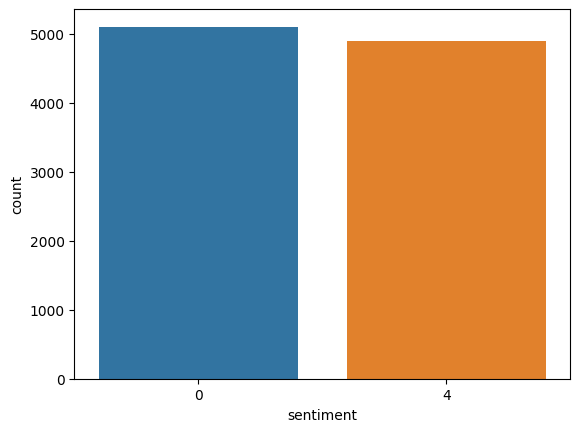

In [ ]:
sns.countplot(x='sentiment', data = The_data)

### **Even tho I took the 10k from the OG data, this bit also seems pretty balanced.**

### **LowerCasing**

Converting all text to lowercase.

Why?

To ensure uniformity and will help in reducing the dimensionality of the data.

In [ ]:
The_data['content'] = The_data['content'].str.lower()
The_data.head()

# vaex_data['content']=vaex_data['content'].str.lower()
# vaex_data.head()

,sentiment,tweet_id,date,flag,user,content
1307927,4,2012574359,Tue Jun 02 20:54:00 PDT 2009,NO_QUERY,shellywellyx1,@jojoalexander ight i let they lil white boy k...
1525243,4,2176839059,Mon Jun 15 04:52:32 PDT 2009,NO_QUERY,EmilyCohn,3 more days of sailllling
348756,0,2016886524,Wed Jun 03 07:31:09 PDT 2009,NO_QUERY,hollyheartsnick,@thereallfo july 10th!! i bet i have 2 work! ...
1312937,4,2013718863,Tue Jun 02 23:23:26 PDT 2009,NO_QUERY,sheppeyescapee,"today is last exam, wahooooooo!"
188209,0,1968833957,Fri May 29 22:19:54 PDT 2009,NO_QUERY,PEACE_LUV_JONAS,@ddlovato i want your sis to let me follow her...


### **HTMLTags, URLs and Emoji Removal**

Self explainatory removing everything mentioned above.

In [ ]:
# for removing html tags from the text.
The_data['content'] = The_data['content'].apply(lambda text: nt.remove_html_tags(text))

# for removing urls from the text.
The_data['content'] = The_data['content'].apply(lambda text: nt.remove_urls(text))

# for removing emojis from the text.
The_data['content'] = The_data['content'].apply(lambda text: nt.remove_emojis(text))
The_data.head()

# vaex_data['content'] = vaex_data['content'].apply(lambda text: nt.remove_html_tags(text))
# vaex_data['content']= vaex_data['content'].apply(lambda text: nt.remove_urls(text))
# vaex_data['content']= vaex_data['content'].apply(lambda text: nt.remove_emojis(text))
# vaex_data['content']= vaex_data['content'].apply(lambda text: nt.remove_emails(text))

# print(vaex_data['content'][:10])

,sentiment,tweet_id,date,flag,user,content
1307927,4,2012574359,Tue Jun 02 20:54:00 PDT 2009,NO_QUERY,shellywellyx1,@jojoalexander ight i let they lil white boy k...
1525243,4,2176839059,Mon Jun 15 04:52:32 PDT 2009,NO_QUERY,EmilyCohn,3 more days of sailllling
348756,0,2016886524,Wed Jun 03 07:31:09 PDT 2009,NO_QUERY,hollyheartsnick,@thereallfo july 10th!! i bet i have 2 work! ...
1312937,4,2013718863,Tue Jun 02 23:23:26 PDT 2009,NO_QUERY,sheppeyescapee,"today is last exam, wahooooooo!"
188209,0,1968833957,Fri May 29 22:19:54 PDT 2009,NO_QUERY,PEACE_LUV_JONAS,@ddlovato i want your sis to let me follow her...


### **Number Removal**

Removing all the numbers.

Why you need them anyway (in text data).

In [ ]:
The_data['content'] = data['content'].apply(lambda text: nt.remove_numbers(text))
The_data['content'][:10]

# vaex_data['content']= vaex_data['content'].apply(lambda text: nt.remove_numbers(text))
# vaex_data['content'][:10]

1307927    @jojoalexander ight i let they lil white boy k...
1525243                             more days of sailllling 
348756     @TheRealLFO july th!!  i bet i have  work! com...
1312937                     Today is last exam, wahooooooo! 
188209     @ddlovato i want your sis to let me follow her...
1156529    School tomorrow. Back to exams  happy i'll get...
829633        @MariahCarey Sleep tight! ^^ love you more!  ?
1393307    On my way to the office. Router upgrades today...
1362056                SHANNON DONT READ MY CONVERSATIONS!! 
712462     @gemma_thomas ermm working  you doing anything...
Name: content, dtype: object

### **SpecialCharaters Removal**

Removing any non-alphabetic characters.

Why?

These often do not contribute to the semantics of the text also why you need them (in NLP Tasks :p)

In [ ]:
The_data['content'] = The_data['content'].apply(lambda text: nt.remove_special_characters(text))
The_data['content'][:10]

# vaex_data['content']= vaex_data['content'].apply(lambda text: nt.remove_special_characters(text))
# vaex_data['content'][:10]

1307927    jojoalexander ight i let they lil white boy kn...
1525243                             more days of sailllling 
348756     TheRealLFO july th  i bet i have  work come  c...
1312937                       Today is last exam wahooooooo 
188209     ddlovato i want your sis to let me follow her ...
1156529    School tomorrow Back to exams  happy ill get t...
829633              MariahCarey Sleep tight  love you more  
1393307    On my way to the office Router upgrades today ...
1362056                  SHANNON DONT READ MY CONVERSATIONS 
712462     gemmathomas ermm working  you doing anything a...
Name: content, dtype: object

### **Handling Contractions**

Expanding the contractions (who don't know =>  "can't" to "cannot").

In [ ]:
The_data['content']= The_data['content'].apply(lambda text: nt.fix_contractions(text))
The_data['content'][:10]

# vaex_data['content']= vaex_data['content'].apply(lambda text: nt.fix_contractions(text))
# vaex_data['content'][:10]

1307927    jojoalexander ight i let they lil white boy kn...
1525243                             more days of sailllling 
348756     thereallfo july th  i bet i have  work come  c...
1312937                       today is last exam wahooooooo 
188209     ddlovato i want your sis to let me follow her ...
1156529    school tomorrow back to exams  happy ill get t...
829633              mariahcarey sleep tight  love you more  
1393307    on my way to the office router upgrades today ...
1362056                  shannon dont read my conversations 
712462     gemmathomas ermm working  you doing anything a...
Name: content, dtype: object

### **Punctuation Removal**

Removing all punctuation marks (which are periods, commas, exclamation marks).

Why?

As they generally aren't much of any information for many NLP tasks.


In [ ]:
The_data['content'] = The_data['content'].apply(lambda text: nt.remove_punctuations(text))
The_data['content'][:10]

# vaex_data['content']= vaex_data['content'].apply(lambda text: nt.remove_punctuations(text))
# vaex_data['content'][:10]

1307927    jojoalexander ight i let they lil white boy kn...
1525243                             more days of sailllling 
348756     thereallfo july th  i bet i have  work come  c...
1312937                       today is last exam wahooooooo 
188209     ddlovato i want your sis to let me follow her ...
1156529    school tomorrow back to exams  happy ill get t...
829633              mariahcarey sleep tight  love you more  
1393307    on my way to the office router upgrades today ...
1362056                  shannon dont read my conversations 
712462     gemmathomas ermm working  you doing anything a...
Name: content, dtype: object

stopword removal

In [ ]:
The_data['content'] = The_data['content'].apply(lambda text: nt.remove_stopwords(text))
The_data['content'][:10]

# vaex_data['content']= vaex_data['content'].apply(lambda text: nt.remove_stopwords(text))
# vaex_data['content'][:10]

1307927     jojoalexander ight let lil white boy know hahaha
1525243                                      days sailllling
348756     thereallfo july th bet work come charlotte im ...
1312937                                today exam wahooooooo
188209     ddlovato want sis let follow wont im sad guys ...
1156529                  school tomorrow exams happy ill ppl
829633                          mariahcarey sleep tight love
1393307    way office router upgrades today weve getting ...
1362056                      shannon dont read conversations
712462     gemmathomas ermm working apart maybe venturing...
Name: content, dtype: object

### **SpellCheck**

Checking for typos and replacing the correct spellings.

In [ ]:
#final
The_data['content'] = The_data['content'].apply(lambda x: str(TextBlob(x).correct()))
The_data['content'][:10]
# from textblob import TextBlob
# vaex_data['content'] = vaex_data['content'].apply(lambda x: str(TextBlob(x).correct()))
# vaex_data['content'][:10]
# took 1 hour to execute

1307927     jojoalexander right let ll white boy know havana
1525243                                      days sailllling
348756     thereallfo july th bet work come charlotte in ...
1312937                                today exam wahooooooo
188209     ddlovato want his let follow wont in sad guns ...
1156529                    school tomorrow exam happy ill pp
829633                          mariahcarey sleep tight love
1393307    way office outer upgrade today were getting cu...
1362056                       cannon dont read conversations
712462     gemmathomas from working apart maybe venturing...
Name: content, dtype: object

### **StopWord Removal**

Removing common, low-information words (mostly "and", "the", "in") known as stopwords.

Because they don't add much value either.

In [ ]:
The_data['content'] = The_data['content'].apply(lambda text: nt.remove_stopwords(text))
The_data['content'][:10]

# vaex_data['content']= vaex_data['content'].apply(lambda text: nt.remove_stopwords(text))
# vaex_data['content'][:10]

1307927        jojoalexander right let white boy know havana
1525243                                      days sailllling
348756     thereallfo july th bet work come charlotte sur...
1312937                                today exam wahooooooo
188209        ddlovato want let follow wont sad guns amazing
1156529                    school tomorrow exam happy ill pp
829633                          mariahcarey sleep tight love
1393307    way office outer upgrade today getting custome...
1362056                       cannon dont read conversations
712462     gemmathomas working apart maybe venturing cine...
Name: content, dtype: object

## **Tokenization**

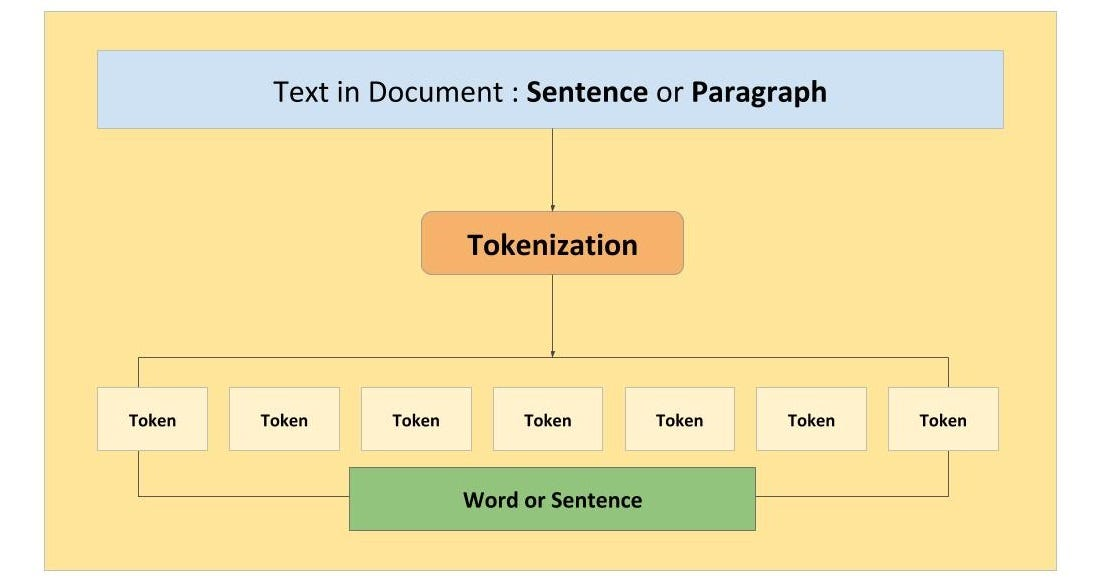

In [ ]:
# Tokenize a sentence into words

The_data['content'] = The_data['content'].apply(lambda text: word_tokenize(str(text)))
The_data['content'][:10]

# vaex_data['content']= vaex_data['content'].apply(lambda text: word_tokenize(str(text)))
# vaex_data['content'][:10]
# type(vaex_data['content'])


1307927    [jojoalexander, right, let, white, boy, know, ...
1525243                                   [days, sailllling]
348756     [thereallfo, july, th, bet, work, come, charlo...
1312937                            [today, exam, wahooooooo]
188209     [ddlovato, want, let, follow, wont, sad, guns,...
1156529             [school, tomorrow, exam, happy, ill, pp]
829633                     [mariahcarey, sleep, tight, love]
1393307    [way, office, outer, upgrade, today, getting, ...
1362056                  [cannon, dont, read, conversations]
712462     [gemmathomas, working, apart, maybe, venturing...
Name: content, dtype: object

## **Lemmatization**

In [ ]:
lemmatizer = WordNetLemmatizer()
# The_data['content'] = The_data['content'].apply(lambda text: [lemmatizer.lemmatize(word,pos='v') for word in str(text) for j in word])
The_data['content'] = The_data['content'].apply(lambda text: [lemmatizer.lemmatize(word,pos='v') for word in text])
The_data['content']

1307927    [jojoalexander, right, let, white, boy, know, ...
1525243                                   [days, sailllling]
348756     [thereallfo, july, th, bet, work, come, charlo...
1312937                            [today, exam, wahooooooo]
188209     [ddlovato, want, let, follow, wont, sad, gun, ...
                                 ...                        
247128                 [burn, thumb, hurt, real, badddddddd]
389791     [pack, today, tomorrow, hopefully, ill, break,...
1351641              [pushplaycj, drink, lot, orange, juice]
656148                           [earlier, ask, time, night]
271632     [khushiall, say, quotyou, confirm, earlier, re...
Name: content, Length: 10000, dtype: object

In [ ]:
The_data.to_csv("/content/drive/MyDrive/PreprocessedTweets.csv", index = False)

In [ ]:
The_preprocessed_data = pd.read_csv("/content/drive/MyDrive/PreprocessedTweets.csv")
The_preprocessed_data.head()

,sentiment,tweet_id,date,flag,user,content
0,4,2012574359,Tue Jun 02 20:54:00 PDT 2009,NO_QUERY,shellywellyx1,"['jojoalexander', 'right', 'let', 'white', 'bo..."
1,4,2176839059,Mon Jun 15 04:52:32 PDT 2009,NO_QUERY,EmilyCohn,"['days', 'sailllling']"
2,0,2016886524,Wed Jun 03 07:31:09 PDT 2009,NO_QUERY,hollyheartsnick,"['thereallfo', 'july', 'th', 'bet', 'work', 'c..."
3,4,2013718863,Tue Jun 02 23:23:26 PDT 2009,NO_QUERY,sheppeyescapee,"['today', 'exam', 'wahooooooo']"
4,0,1968833957,Fri May 29 22:19:54 PDT 2009,NO_QUERY,PEACE_LUV_JONAS,"['ddlovato', 'want', 'let', 'follow', 'wont', ..."


### **Label Encoder**

In [ ]:
label_encoder = preprocessing.LabelEncoder()

The_preprocessed_data['sentiment']= label_encoder.fit_transform(The_preprocessed_data['sentiment'])

The_preprocessed_data['sentiment'].unique()

## **Feature Extraction and data spliting**

Spliting the data into three parts i.e train, test and validation.

And the distribution being 70%, 15% and 15% for the respective parts.

In [ ]:
X = The_preprocessed_data['content']
y = The_preprocessed_data['sentiment']

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training, 30% temp

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 15% validation, 15% testing

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape

In [ ]:
print("-----y train-----\n",y_train.value_counts())
print("-----y test-----\n",y_test.value_counts())

### **Embedding Layer**

In [ ]:
word_tokenizer= Tokenizer()
word_tokenizer.fit_on_texts(X_train)
X_train= word_tokenizer.texts_to_sequences(X_train)
X_test= word_tokenizer.texts_to_sequences(X_test)
X_val= word_tokenizer.texts_to_sequences(X_val)

In [ ]:
vocab_length= len(word_tokenizer.word_index)+1
vocab_length

Padding to a fixed length of 100

In [ ]:
maxlen= 100
X_train=pad_sequences(X_train, padding='post',maxlen=maxlen)
X_test=pad_sequences(X_test, padding='post',maxlen=maxlen)
X_val=pad_sequences(X_val, padding='post',maxlen=maxlen)

## **CNN Model**

In [ ]:
# Define the model
cnn_model = Sequential()

# Embedding Layer:
cnn_model.add(Embedding(input_dim=vocab_length, output_dim=100, input_length=maxlen))

# Convolutional Layers:
cnn_model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
cnn_model.add(GlobalMaxPooling1D())

# Dense Layers:
cnn_model.add(Dense(128, kernel_regularizer=l2(0.01)))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(Dropout(0.5))  # Adding Dropout with 50%
cnn_model.add(Dense(2, activation='sigmoid'))


In [ ]:
# Compile the model:
from keras.optimizers import SGD
opt = SGD(learning_rate = 0.01)
# cnn_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# print(cnn_model.summary())
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

print(cnn_model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          984800    
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_2 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 activation_2 (Activation)   (None, 128)              

In [ ]:
# Model training
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1,validation_data=(X_val, y_val),callbacks=[early_stop])


Epoch 1/15
55/55 [==============================] - 9s 133ms/step - loss: 1.6244 - accuracy: 0.5583 - val_loss: 1.2974 - val_accuracy: 0.6060
Epoch 2/15
55/55 [==============================] - 8s 146ms/step - loss: 0.8476 - accuracy: 0.8303 - val_loss: 0.9673 - val_accuracy: 0.6627
Epoch 3/15
55/55 [==============================] - 6s 113ms/step - loss: 0.3917 - accuracy: 0.9480 - val_loss: 0.8099 - val_accuracy: 0.6660
Epoch 4/15
55/55 [==============================] - 9s 168ms/step - loss: 0.1910 - accuracy: 0.9860 - val_loss: 0.7201 - val_accuracy: 0.6507
Epoch 5/15
55/55 [==============================] - 6s 108ms/step - loss: 0.1082 - accuracy: 0.9923 - val_loss: 0.6642 - val_accuracy: 0.6600
Epoch 6/15
55/55 [==============================] - 8s 152ms/step - loss: 0.0712 - accuracy: 0.9933 - val_loss: 0.6403 - val_accuracy: 0.6560
Epoch 7/15
55/55 [==============================] - 7s 123ms/step - loss: 0.0485 - accuracy: 0.9967 - val_loss: 0.6490 - val_accuracy: 0.6493
Epoch 

In [ ]:
# Predictions on the Test Set

score=cnn_model.evaluate(X_test,y_test)

47/47 [==============================] - 0s 9ms/step - loss: 0.6346 - accuracy: 0.6853


In [ ]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

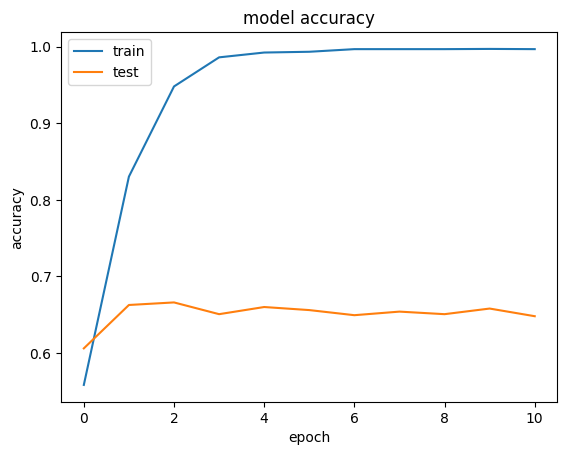

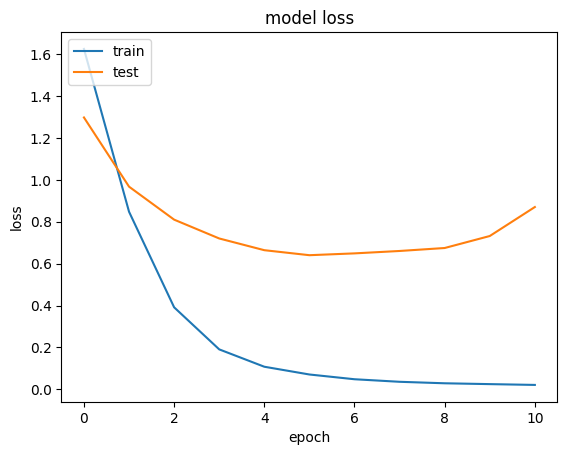

In [ ]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['accuracy'])
plt.plot(cnn_model_history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()